In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# to load dataset
df=pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Remove unwanted column Serial No. from dataset
df.drop(["Serial No."],axis=1,inplace=True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Now we have to select which features are important to predict the output for that we have to check correlation
# so to check correlatin we have to use scatterplot
# scatterplot is made only on continuous numeric type column

In [7]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
# continuous numeric input features
X=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
Y=df["Chance of Admit "]

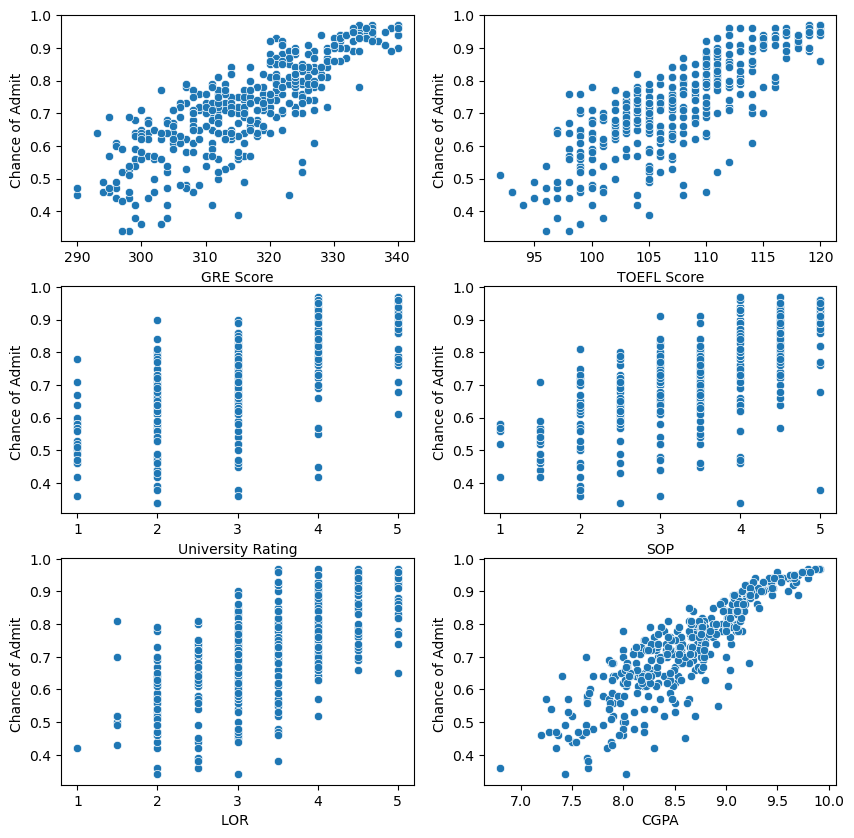

In [9]:
plt.figure(figsize=(10,10))
for i,col in enumerate(X):
    plt.subplot(3,2,i+1)   # 3 rows, 2columns,i+1 to move to next feature graph 
    sns.scatterplot(data=df,x=col,y="Chance of Admit ")

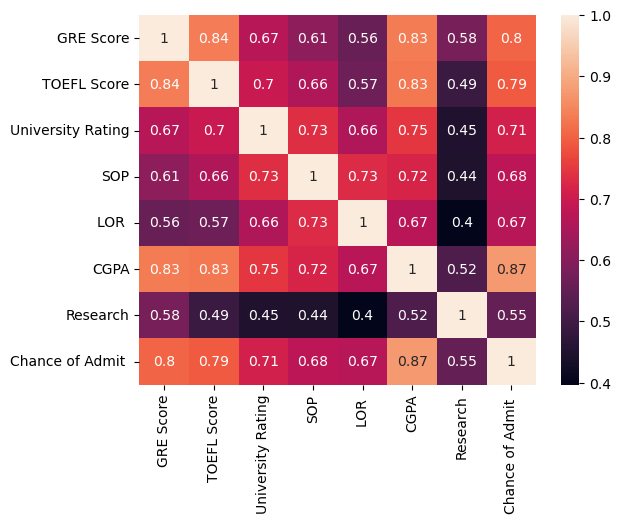

In [10]:
# check correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

In [1]:
# Now we can see that all the inputs are having good correlation with the output

In [11]:
# check null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

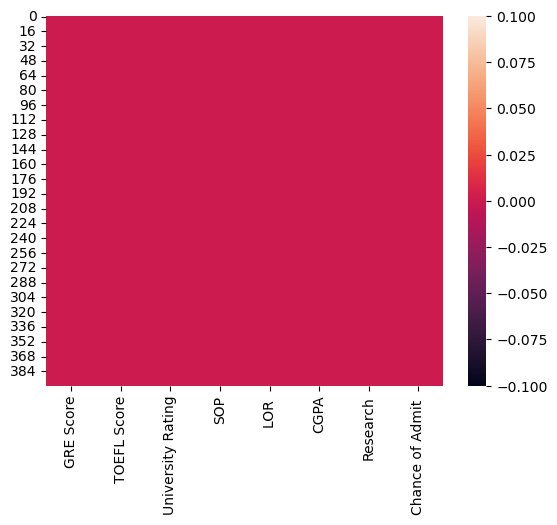

In [12]:
# visualize null
sns.heatmap(df.isnull())
plt.show()

In [13]:
# check datatype
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [14]:
# check duplicates value
df.duplicated().sum()

0

In [15]:
# check skewness for all continuous numeric columns
# if found skewness then reduce it only if that column is having bad correlation with output if good correation than
# dont  reduce because if it will change the pattern of the data which might affect the accuracy 

In [16]:
# using for loop to visualize skewness 


In [17]:
# incase if duplicates found than drop all duplicates by using 
# df.drop_duplicates(inplace=True)

In [18]:
# select input and output
# X=df.drop(["Chance of Admit "],axis=1)
# Y=df["Chance of Admit "]

In [19]:
# X.head()

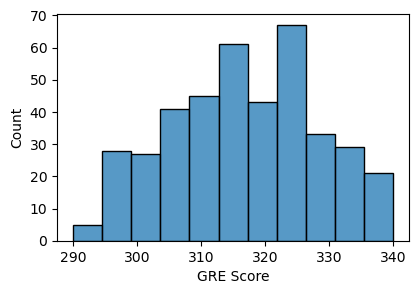

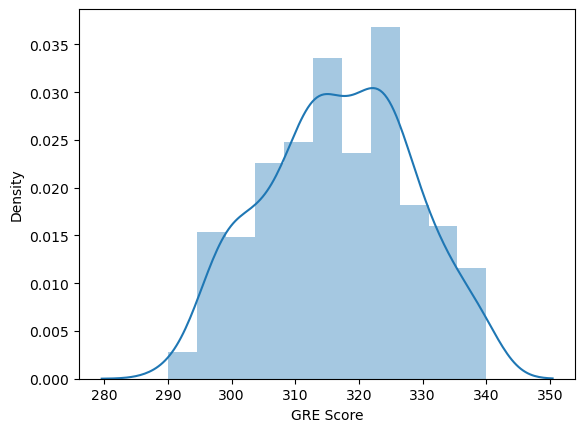

skewness of GRE Score : -0.0628934593601882


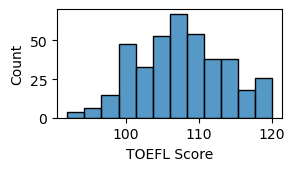

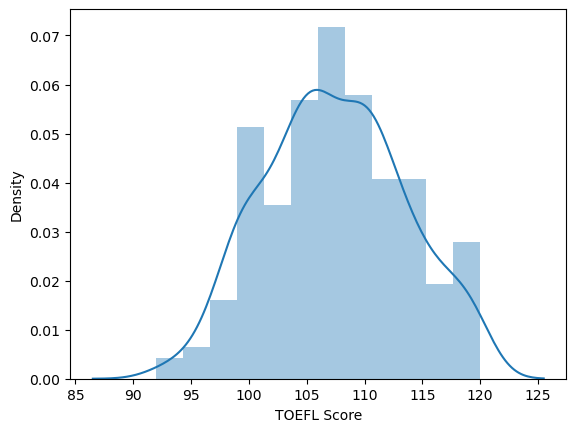

skewness of TOEFL Score : 0.05721591369844269


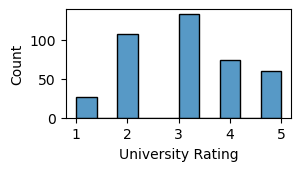

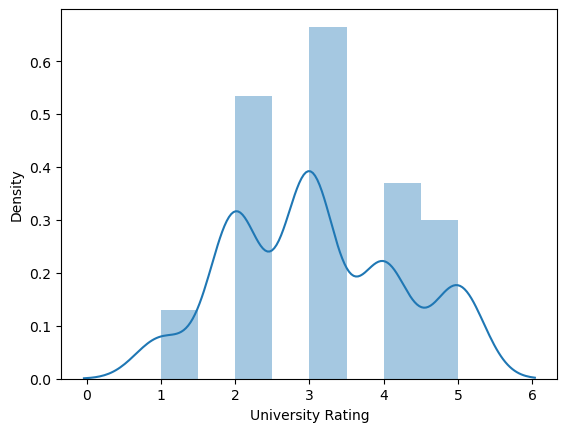

skewness of University Rating : 0.17126027744362737


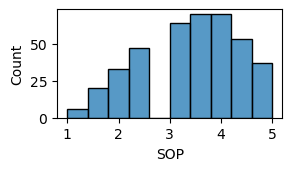

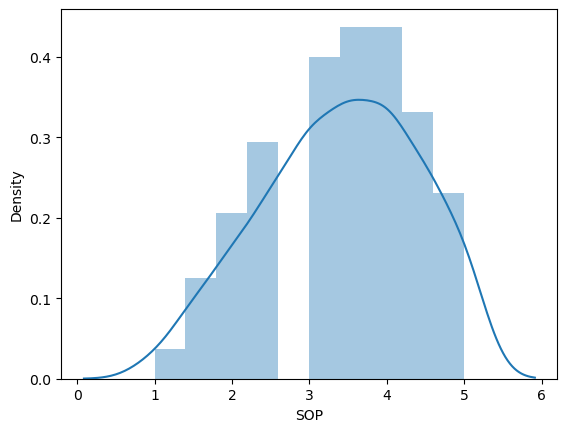

skewness of SOP : -0.27576116806333434


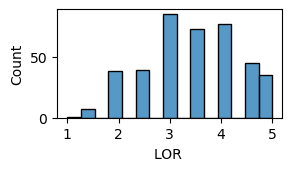

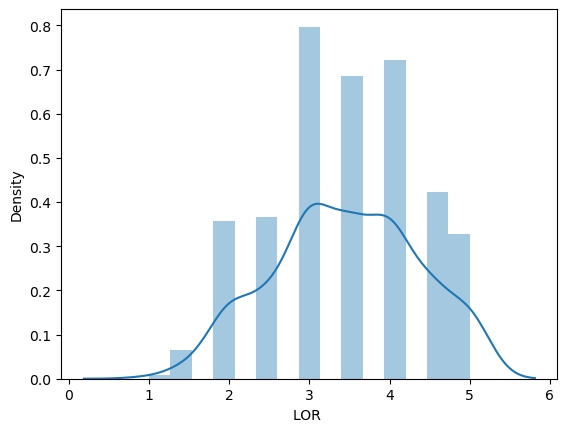

skewness of LOR  : -0.10699147866617165


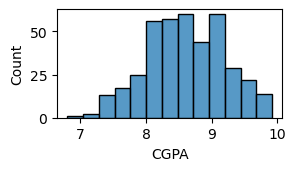

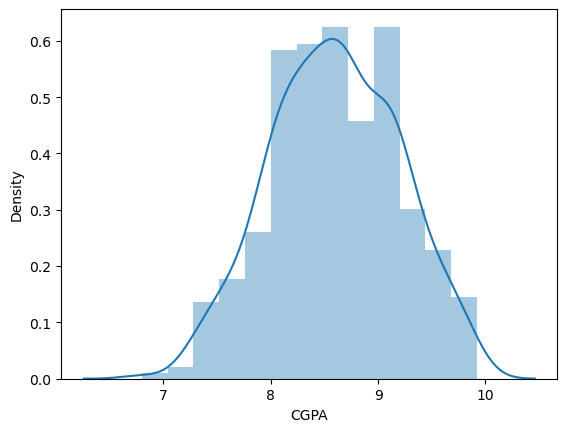

skewness of CGPA : -0.06599054377889167


In [20]:
X=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
plt.figure(figsize=(10,10))
for i,col in enumerate(X):
    plt.subplot(3,2,i+1)
    sns.histplot(df[col])
    plt.show()
    sns.distplot(df[col])
    plt.show()
    print("skewness of {} : {}".format(col,df[col].skew()))

In [21]:
# so we can see that there is skewness in three columns university rating,SOP and LOR but we will not transform it because
# they are having good corelation with the output

In [22]:
# select input and output
X=df.drop(["Chance of Admit "],axis=1)
Y=df["Chance of Admit "]

In [23]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [24]:
# train_test_split
from sklearn.model_selection import train_test_split

In [26]:
X_train.shape

(320, 7)

In [27]:
X_test.shape

(80, 7)

In [28]:
# Apply scaling MinMaxScaler (Normalization):
# because here we know both minimum and maximum value for all columns
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Create object of MinMaxScaler class
mms=MinMaxScaler()

In [30]:
# apply scaling
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [31]:
X_train

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [32]:
# import class :-
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
# create a function 
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    # find Mean_squared_Error
    print("Mean_sq_error",mean_squared_error(Y_test,Y_pred))
    print("R2_score",r2_score(Y_test,Y_pred))
    print("Training_score",model.score(X_train,Y_train))
    print("Testing_score",model.score(X_test,Y_test))
    return model, Y_pred
    

In [34]:
# create the object of Linear_regression class
lr=LinearRegression()

In [35]:
# call function
lr,Y_pred=create_model(lr)

Mean_sq_error 0.004442679729994739
R2_score 0.8079043677020102
Training_score 0.800877808114134
Testing_score 0.8079043677020102


In [36]:
# Now check assumptions of Linear Regression
# 1. Linear Relation between input and output
# trick :
# Find residual means(actual-predicted)
residual=Y_test-Y_pred

In [37]:
residual

398   -0.052694
125   -0.054132
328    0.011355
339    0.027840
172    0.006566
         ...   
347   -0.021130
41    -0.169061
180    0.095520
132    0.005294
224    0.063889
Name: Chance of Admit , Length: 80, dtype: float64

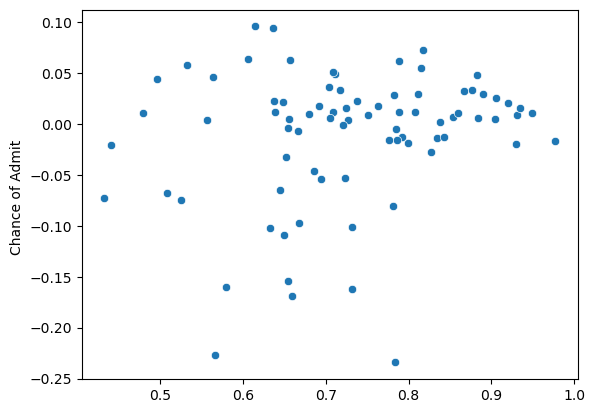

In [38]:
# visualize scatter plot between Y_pred and residual
# here  x-axis = Y_pred and y-axis=residual because residual depends on Y_Pred
sns.scatterplot(x=Y_pred,y=residual)
plt.show()

-1.4439782962197905


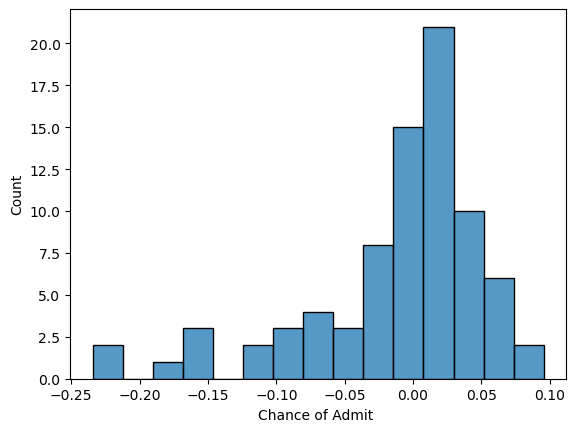

In [39]:
# check if there is normal distribution of the data
sns.histplot(residual)
print(residual.skew())
plt.show()

In [40]:
# check multicolinearity (for that above check corelation diagram)
# Now there is correlation between every column so we will take only column who's corelation is highest with the output
# which is CGPA
X=df[["CGPA"]]
Y=df["Chance of Admit "]

In [41]:
# Now there is no linear relation between input and output
# And the distribution is heteroskedastic
# And there is no normal distribution and negative skewness present in the data

In [42]:
# Now again train the model on New input X
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


In [43]:
# create the object of linear regression class
lr1=LinearRegression()

In [44]:
# call function:-
lr1,Y_pred=create_model(lr1)

Mean_sq_error 0.005339928776920713
R2_score 0.769108498210374
Training_score 0.760049200545038
Testing_score 0.769108498210374


In [45]:
#check assumptions :-
# calculate residual
residual=Y_test-Y_pred

In [46]:
print(residual)

398   -0.093200
125   -0.098573
328    0.038852
339    0.071427
172    0.024971
         ...   
347   -0.047676
41    -0.154170
180    0.074039
132   -0.008051
224    0.019674
Name: Chance of Admit , Length: 80, dtype: float64


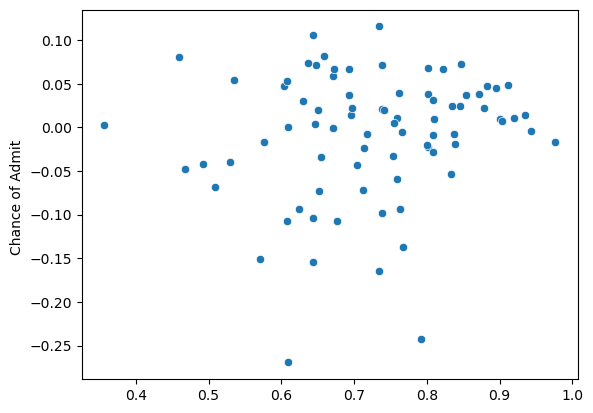

In [47]:
# Now again check assumption 
# 1. Linear relation between input and output
# output = residual and input = Y_pred
sns.scatterplot(Y_pred,residual)
plt.show()

In [48]:
# still not linear relation and heteroskdastic
# lets check if normal distribution and skewness

-1.241339026484178


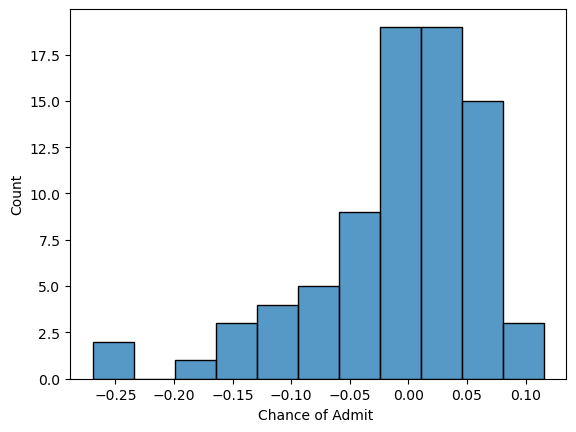

In [49]:
sns.histplot(residual)
print(residual.skew())
plt.show()

In [50]:
# now our 3 assumptions are not fulfilled
# so now we have to give our dataset to polynomial linear regression
# means increase the degree of the input 
# call inbuilt class polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [51]:
# create the object of the poynomial features class
pf=PolynomialFeatures(4) # here 2 is the degree of input
# now when the degree was 2 there waas no change in the score and error so we increased the degree to 3, now again 
# increase the degree by 4

In [52]:
# now apply fit_transform inbuilt methof of polynomialfeatures
X_poly=pf.fit_transform(X)  # Y= m1*CGPA^2+m2*CGPA+c

In [53]:
# Now again after increasing the degree of input train the model 
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.2,random_state=1)

In [54]:
# create the object of linear regression class
lr2=LinearRegression()

In [55]:
# call function
lr2,Y_pred=create_model(lr2)

Mean_sq_error 0.005370013379862909
R2_score 0.7678076795207895
Training_score 0.7619531105148658
Testing_score 0.7678076795207895


In [56]:
# Now check if the assumption are getting fulfilled
# get residual
residual=Y_test-Y_pred
print(residual)

398   -0.089544
125   -0.092881
328    0.042711
339    0.077119
172    0.019670
         ...   
347   -0.055062
41    -0.150273
180    0.077087
132   -0.001401
224    0.024146
Name: Chance of Admit , Length: 80, dtype: float64


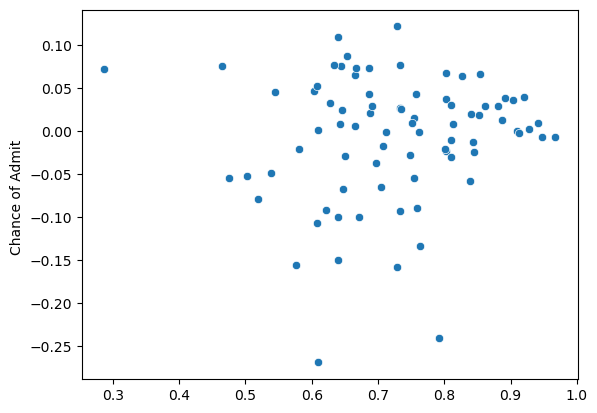

In [57]:
# 1. Linear relation between input and output
# output = residual and input = Y_pred
sns.scatterplot(Y_pred,residual)
plt.show()

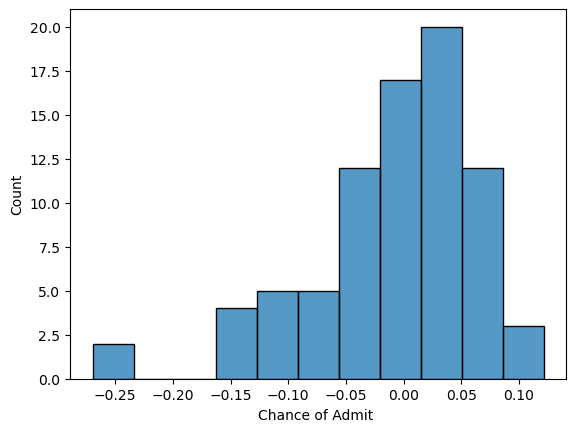

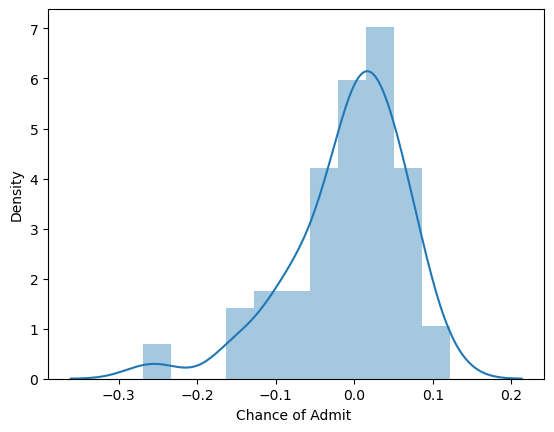

-1.196014959124138


In [58]:
sns.histplot(residual)
plt.show()

sns.distplot(residual)
plt.show()
print(residual.skew())


In [59]:
# Now we can see that there is linear relation between input and output when the degree is 4 
# and also homoskedastick
# and No multicolinearity 
# so our 3 assumptions are fuilfiled out of 4 
# only the last assumption is not fuilfied (skewness)
# And we are getting R2_score 0.767 based on which we will deploy our model 